In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy
%config IPCompleter.greedy=True

### Requirement:
We have the dataset **mammals.csv**. This dataset contains information about mammals. Here is step need to done:
1. Read dataset, do basic analysis on BrainWt and BodyWt column. Review the relationship between them and visualize. 
2. In order to predict BrainWt base on BodyWt, we need to check and standardize data. Choose one data standardization method and visualize them after.


In [4]:
mammal_data = pd.read_csv("data/mammals.csv")

In [5]:
mammal_data.head()

,Unnamed: 0,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,1,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,3,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,4,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [6]:
mammal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
Unnamed: 0     62 non-null int64
Species        62 non-null object
BodyWt         62 non-null float64
BrainWt        62 non-null float64
NonDreaming    48 non-null float64
Dreaming       50 non-null float64
TotalSleep     58 non-null float64
LifeSpan       58 non-null float64
Gestation      58 non-null float64
Predation      62 non-null int64
Exposure       62 non-null int64
Danger         62 non-null int64
dtypes: float64(7), int64(4), object(1)
memory usage: 5.9+ KB


In [7]:
new_mammal = mammal_data[['BrainWt', 'BodyWt']]
new_mammal.head()

,BrainWt,BodyWt
0,5712.0,6654.000
1,6.6,1.000
2,44.5,3.385
3,5.7,0.920
4,4603.0,2547.000


In [8]:
new_mammal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
BrainWt    62 non-null float64
BodyWt     62 non-null float64
dtypes: float64(2)
memory usage: 1.0 KB


### There is no NULL value on this dataset

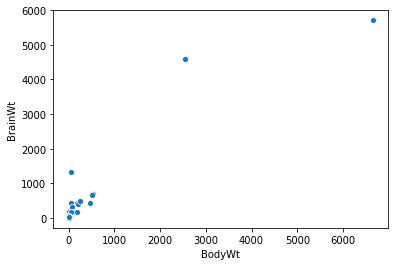

In [9]:
sb.scatterplot(x = new_mammal.BodyWt, y = new_mammal.BrainWt)
plt.show()

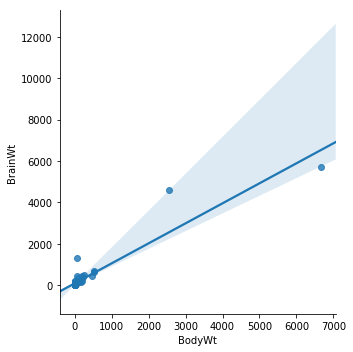

In [10]:
sb.lmplot(x = "BodyWt", y = "BrainWt", data = new_mammal)

In [11]:
def continous_analysis(data, col):
    colSer = data[col]
    mean = colSer.mean()
    mode = colSer.mode()
    median = colSer.median()
    skew = colSer.skew()
    kurtois = colSer.kurtosis()
    print("==============================")
    print(col, "Mean:", mean)
    print(col, "Mode:", mode.values)
    print(col, "Median:", median)
    print(col, "Skew:", skew)
    print(col, "Kurtois:", kurtois)
    print("\n")

In [12]:
for col in new_mammal.columns:
    continous_analysis(new_mammal, col)

BrainWt Mean: 283.1341935483871
BrainWt Mode: [  1.   12.3 115. ]
BrainWt Median: 17.25
BrainWt Skew: 5.071589456939673
BrainWt Kurtois: 26.270581235350292


BodyWt Mean: 198.78998387096775
BodyWt Mode: [0.023 3.5  ]
BodyWt Median: 3.3425
BodyWt Skew: 6.563608062833757
BodyWt Kurtois: 45.74102025601449




###  BrainWt Skew and BodyWt Skew have skew value is greater than zero 0 ==> positive distribution and almost values are in 0 to 2000. So we apply Log normalization in order to view them clearly

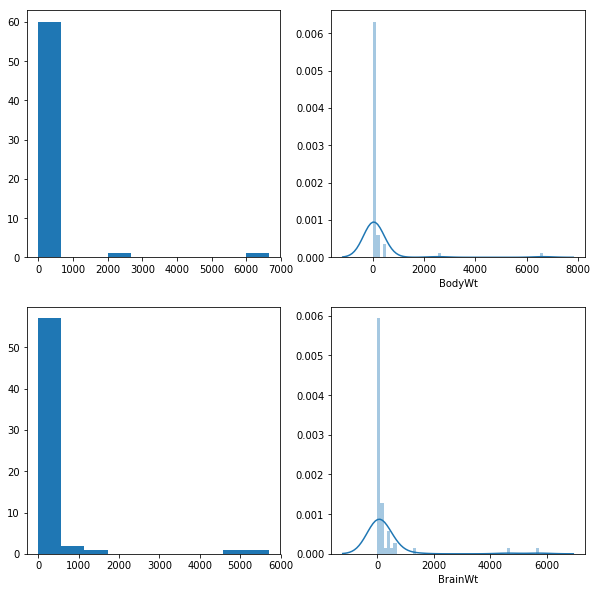

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(new_mammal.BodyWt)
plt.subplot(2,2,2)
sb.distplot(new_mammal.BodyWt)
plt.subplot(2,2,3)
plt.hist(new_mammal.BrainWt)
plt.subplot(2,2,4)
sb.distplot(new_mammal.BrainWt)

In [14]:
new_mammal.BodyWt = np.log(new_mammal.BodyWt)
new_mammal.BrainWt = np.log(new_mammal.BrainWt)

/home/dat-tran/.local/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


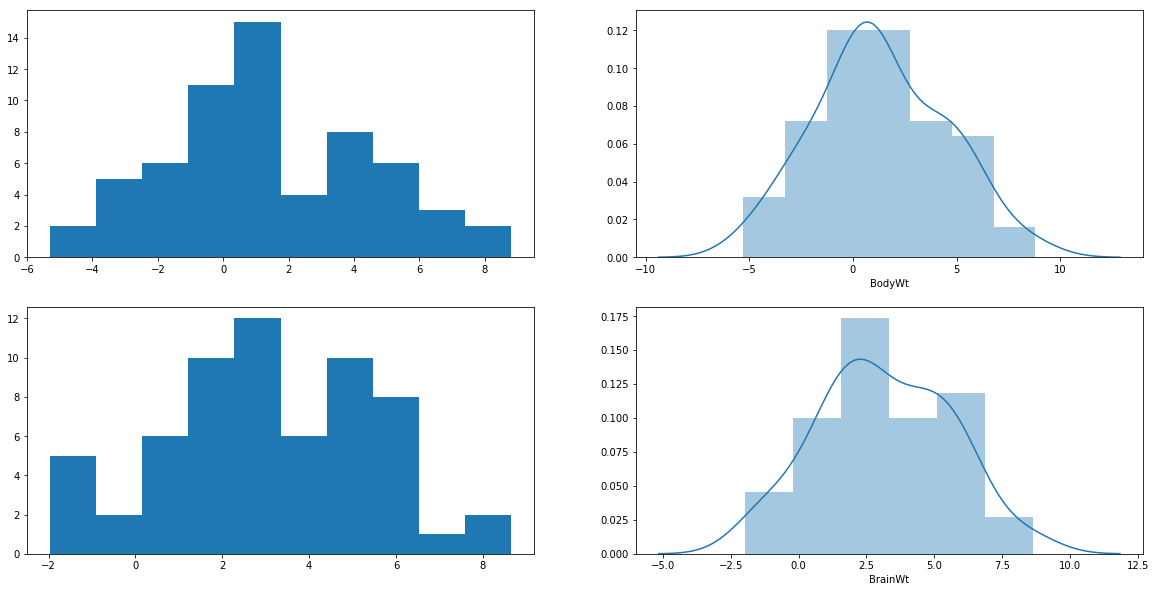

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(new_mammal.BodyWt)
plt.subplot(2,2,2)
sb.distplot(new_mammal.BodyWt)
plt.subplot(2,2,3)
plt.hist(new_mammal.BrainWt)
plt.subplot(2,2,4)
sb.distplot(new_mammal.BrainWt)

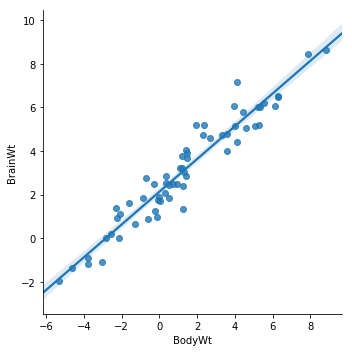

In [16]:
sb.lmplot(x = "BodyWt", y = "BrainWt", data = new_mammal)